In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import scipy.stats

In [2]:
path = '/home/centos/suhyeok/TPS_8_22/data/'
train_df = pd.read_csv(path+'train.csv')
test_df= pd.read_csv(path+'test.csv')

In [3]:
train_df.shape, test_df.shape

((26570, 26), (20775, 25))

In [4]:
train_df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
test_df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [6]:
print(train_df.failure.value_counts() / len(train_df))

0    0.787392
1    0.212608
Name: failure, dtype: float64


In [7]:
float_cols = [f for f in train_df.columns if train_df[f].dtype == float]
pd.concat([train_df[float_cols].isna().sum().rename('missing values in train'),
           test_df[float_cols].isna().sum().rename('missing values in test')],
          axis=1)

,missing values in train,missing values in test
loading,250,223
measurement_3,381,329
measurement_4,538,409
measurement_5,676,508
measurement_6,796,624
measurement_7,937,720
measurement_8,1048,846
measurement_9,1227,904
measurement_10,1300,1067
measurement_11,1468,1136


In [8]:
set(train_df.product_code)

{'A', 'B', 'C', 'D', 'E'}

In [9]:
set(test_df.product_code)

{'F', 'G', 'H', 'I'}

In [10]:
measurement_cols = [i for i in train_df.columns if "measurement" in i]

In [11]:
measurement_cols

['measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [12]:
measurement_int_cols = [i for i in measurement_cols if train_df[i].dtype == int]

In [13]:
measurement_int_cols

['measurement_0', 'measurement_1', 'measurement_2']

In [14]:
measurement_float_cols = [i for i in measurement_cols if train_df[i].dtype == float]

In [15]:
measurement_float_cols

['measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [16]:
float_cols = [i for i in train_df.columns if train_df[i].dtype == float]

In [17]:
float_cols

['loading',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [18]:
attribute_cols = [i for i in train_df.columns if "attribute" in i]

In [19]:
attribute_cols

['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3']

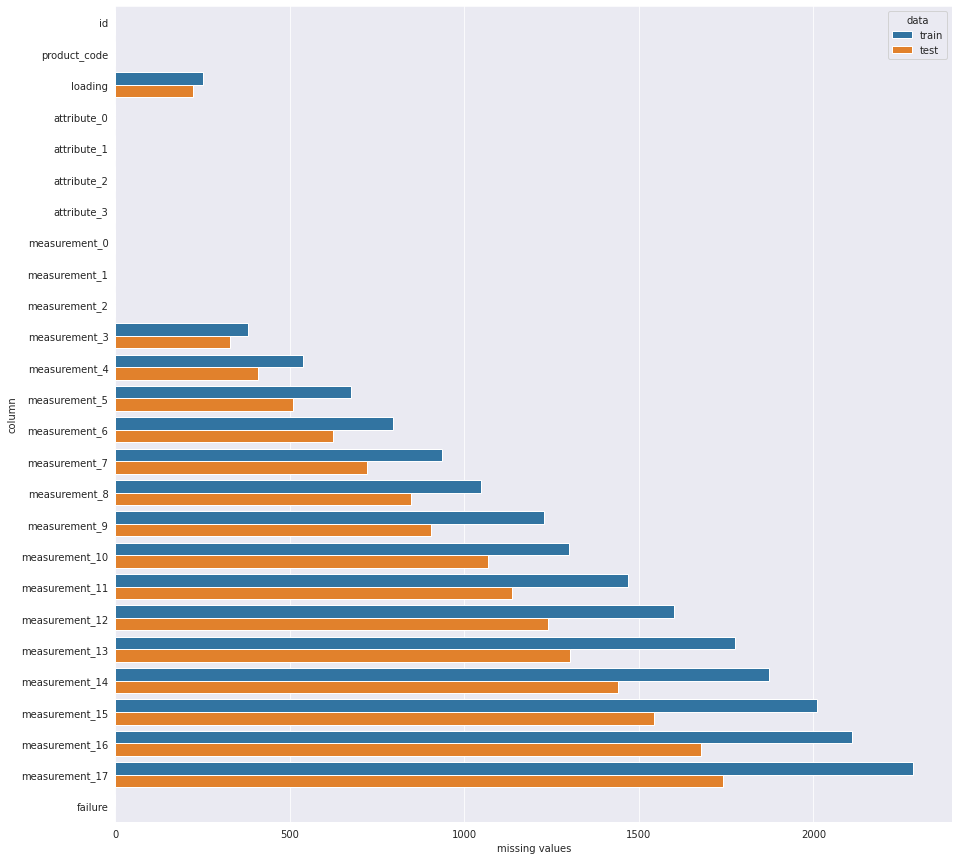

In [20]:
missing_values = pd.concat([train_df.isna().sum().rename("train"),test_df.isna().sum().rename("test")],axis=1)
missing_values = pd.concat([train_df.isna().sum(), test_df.isna().sum()], axis=0).rename("missing values").reset_index().rename(columns={"index":"column"})
missing_values["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
f,ax = plt.subplots(figsize=(15,15))
sns.barplot(data = missing_values, y="column", x="missing values", hue="data", orient="h");

feature           fail   miss   failure rate       z    p-value
loading         :   44 /  250 = 0.176          -1.41      0.157
measurement_3   :   61 /  381 = 0.160          -2.50      0.012
measurement_4   :  128 /  538 = 0.238           1.43      0.151
measurement_5   :  172 /  676 = 0.254           2.66      0.008
measurement_6   :  171 /  796 = 0.215           0.15      0.879
measurement_7   :  197 /  937 = 0.210          -0.18      0.860
measurement_8   :  218 / 1048 = 0.208          -0.36      0.716
measurement_9   :  283 / 1227 = 0.231           1.54      0.123
measurement_10  :  277 / 1300 = 0.213           0.04      0.967
measurement_11  :  311 / 1468 = 0.212          -0.07      0.944
measurement_12  :  356 / 1601 = 0.222           0.95      0.340
measurement_13  :  373 / 1774 = 0.210          -0.24      0.809
measurement_14  :  413 / 1874 = 0.220           0.82      0.411
measurement_15  :  430 / 2009 = 0.214           0.16      0.876
measurement_16  :  436 / 2110 = 0.207   

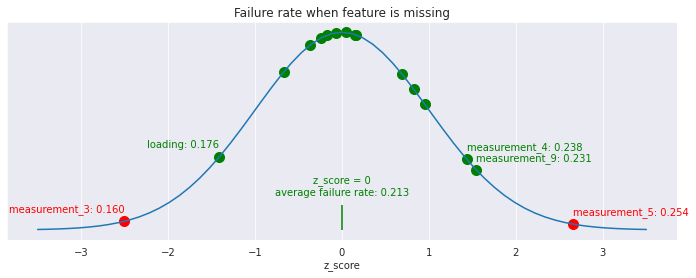

In [25]:
# Start by plotting the bell curve
# float column들 중에 skew된 애들 check
plt.figure(figsize=(12, 4))
z_ticks = np.linspace(-3.5, 3.5, 61)
pdf = scipy.stats.norm.pdf(z_ticks)
plt.plot(z_ticks, pdf)

# Calculate the conditional failure rate for every missing feature
# Print the values and plot them
print('feature           fail   miss   failure rate       z    p-value')
for f in train_df.columns:
    if train_df[f].isna().sum() > 0:
        total = train_df[f].isna().sum()
        fail = train_df[train_df[f].isna()].failure.sum()
        z = (fail / total - 0.212608) / (np.sqrt(0.212608 * (1-0.212608)) / np.sqrt(total))
        plt.scatter([z], [scipy.stats.norm.pdf(z)], c='r' if abs(z) > 2 else 'g', s=100)
        print(f"{f:15} : {fail:4} / {total:4} = {fail/total:.3f}          {z:5.2f}      {2*scipy.stats.norm.cdf(-abs(z)):.3f}")
        if abs(z) > 1: plt.annotate(f"{f}: {fail / total:.3f}",
                                    (z, scipy.stats.norm.pdf(z)),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='left' if z > 0 else 'right',
                                    color='r' if abs(z) > 2 else 'g')
            
# Annotage the center (z=0)
plt.vlines([0], 0, 0.05, color='g')
plt.annotate(f"z_score = 0\naverage failure rate: {0.212608:.3f}",
                                    (0, 0.05),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='center',
                                    color='g')
plt.title('Failure rate when feature is missing')
plt.yticks([])
plt.xlabel('z_score')
plt.show()

In [26]:
# 개수 세는 함수
def val_count_df(df,column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count", "index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

In [27]:
def plot_and_display_valuecounts(df, column_name, sort_by_column_name):
    val_count = val_count_df(df,column_name, sort_by_column_name)
    display(val_count)
    
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5),legend=False,ylabel="");

In [28]:
def plot_and_display_compare_valuecounts(df1, df2, column_name, sort_by_column_name):
    val_count_1 = val_count_df(df1, column_name, sort_by_column_name)
    val_count_1 = val_count_1.rename(columns={"Value Count":"train_value_count", "Percentage":"train_percentage"})
    val_count_2 = val_count_df(df2, column_name, sort_by_column_name)
    val_count_2 = val_count_2.rename(columns={"Value Count":"test_value_count", "Percentage":"test_percentage"})
    
    val_count = pd.merge(val_count_1, val_count_2, on=column_name, how="outer")
    val_count = val_count.fillna(0) # if the data is missing from a column, there is none so we fill with 0's
    display(val_count)
    
    val_count = val_count.drop(columns=["train_percentage", "test_percentage"]) #avoid duplicating pie plots
    val_count.set_index(column_name).plot.pie(figsize=(12,7), legend=False, ylabel="", subplots=True, title=["Train","Test"]);

,failure,Value Count,Percentage
0,0,20921,78.73918
1,1,5649,21.26082


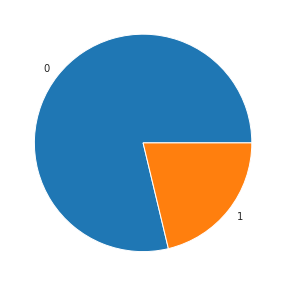

In [29]:
plot_and_display_valuecounts(train_df, "failure", False)
# failure 확인

,product_code,train_value_count,train_percentage,test_value_count,test_percentage
0,A,5100.0,19.194580,0.0,0.000000
1,B,5250.0,19.759127,0.0,0.000000
2,C,5765.0,21.697403,0.0,0.000000
3,D,5112.0,19.239744,0.0,0.000000
4,E,5343.0,20.109146,0.0,0.000000
5,F,0.0,0.000000,5422.0,26.098676
6,G,0.0,0.000000,5107.0,24.582431
7,H,0.0,0.000000,5018.0,24.154031
8,I,0.0,0.000000,5228.0,25.164862


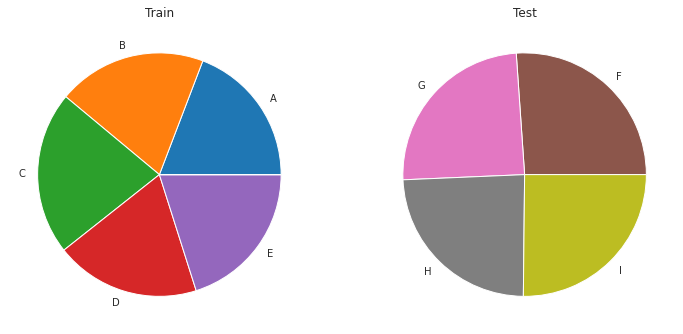

In [30]:
# train과 test의 product_code 확인
plot_and_display_compare_valuecounts(train_df, test_df, "product_code", True)

In [31]:
set(train_df.attribute_0)

{'material_5', 'material_7'}

,attribute_0,train_value_count,train_percentage,test_value_count,test_percentage
0,material_5,5250,19.759127,10529,50.681107
1,material_7,21320,80.240873,10246,49.318893


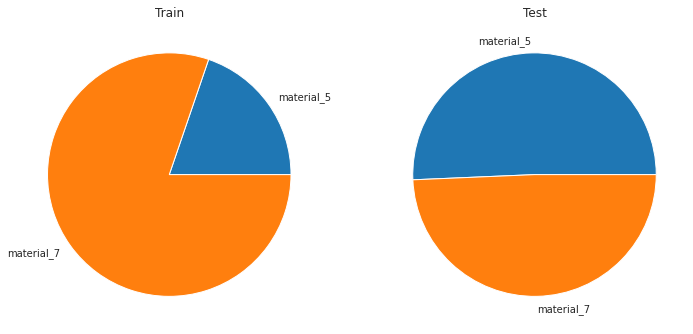

In [32]:
# train과 test의 attribute_0 구성 확인
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_0", True)

In [33]:
set(train_df.attribute_1)

{'material_5', 'material_6', 'material_8'}

,attribute_1,train_value_count,train_percentage,test_value_count,test_percentage
0,material_5,10362.0,38.998871,5228.0,25.164862
1,material_6,5343.0,20.109146,10529.0,50.681107
2,material_8,10865.0,40.891983,0.0,0.000000
3,material_7,0.0,0.000000,5018.0,24.154031


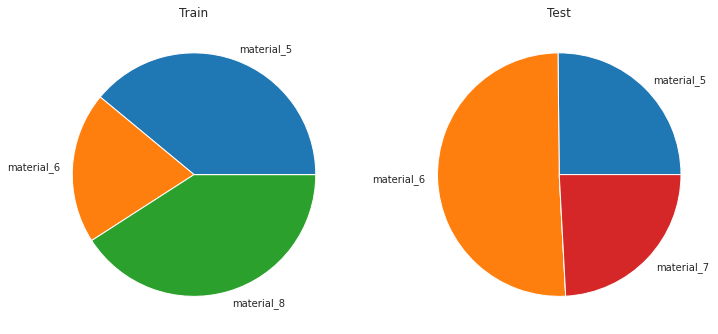

In [34]:
# train과 test의 attribute_1 구성 확인
plot_and_display_compare_valuecounts(train_df,test_df,"attribute_1", True)

In [35]:
set(train_df.attribute_2)

{5, 6, 8, 9}

,attribute_2,train_value_count,train_percentage,test_value_count,test_percentage
0,5,5765.0,21.697403,0.0,0.000000
1,6,10455.0,39.348890,5422.0,26.098676
2,8,5250.0,19.759127,0.0,0.000000
3,9,5100.0,19.194580,10335.0,49.747292
4,7,0.0,0.000000,5018.0,24.154031


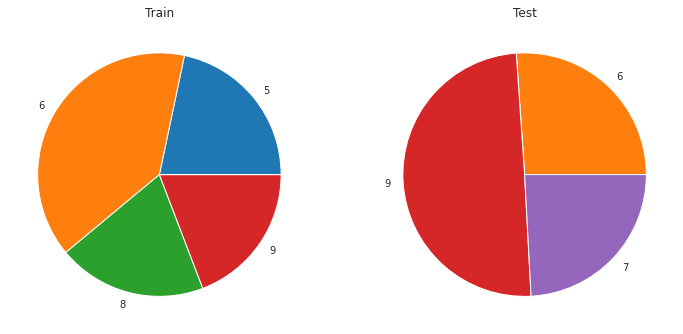

In [36]:
# train과 test의 attribute_2 구성 확인
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_2", True)

In [37]:
set(train_df.attribute_3)

{5, 6, 8, 9}

,attribute_3,train_value_count,train_percentage,test_value_count,test_percentage
0,5,5100.0,19.194580,5228.0,25.164862
1,6,5112.0,19.239744,0.0,0.000000
2,8,11015.0,41.456530,0.0,0.000000
3,9,5343.0,20.109146,5018.0,24.154031
4,4,0.0,0.000000,5422.0,26.098676
5,7,0.0,0.000000,5107.0,24.582431


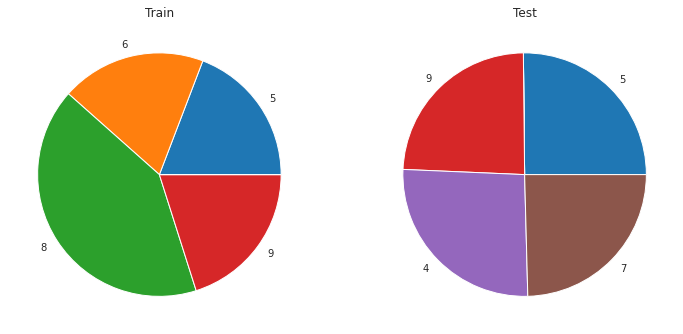

In [38]:
# train과 test의 attribute_3 구성 확인
plot_and_display_compare_valuecounts(train_df, test_df, "attribute_3", True)

In [39]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0", "attribute_1", "attribute_2", "attribute_3"]].nunique()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,1,1,1,1
B,1,1,1,1
C,1,1,1,1
D,1,1,1,1
E,1,1,1,1
F,1,1,1,1
G,1,1,1,1
H,1,1,1,1
I,1,1,1,1


In [40]:
pd.concat([train_df,test_df]).groupby(["product_code"])[["attribute_0","attribute_1","attribute_2","attribute_3"]].first()

,attribute_0,attribute_1,attribute_2,attribute_3
product_code,,,,
A,material_7,material_8,9,5
B,material_5,material_5,8,8
C,material_7,material_8,5,8
D,material_7,material_5,6,6
E,material_7,material_6,6,9
F,material_5,material_6,6,4
G,material_5,material_6,9,7
H,material_7,material_7,7,9
I,material_7,material_5,9,5


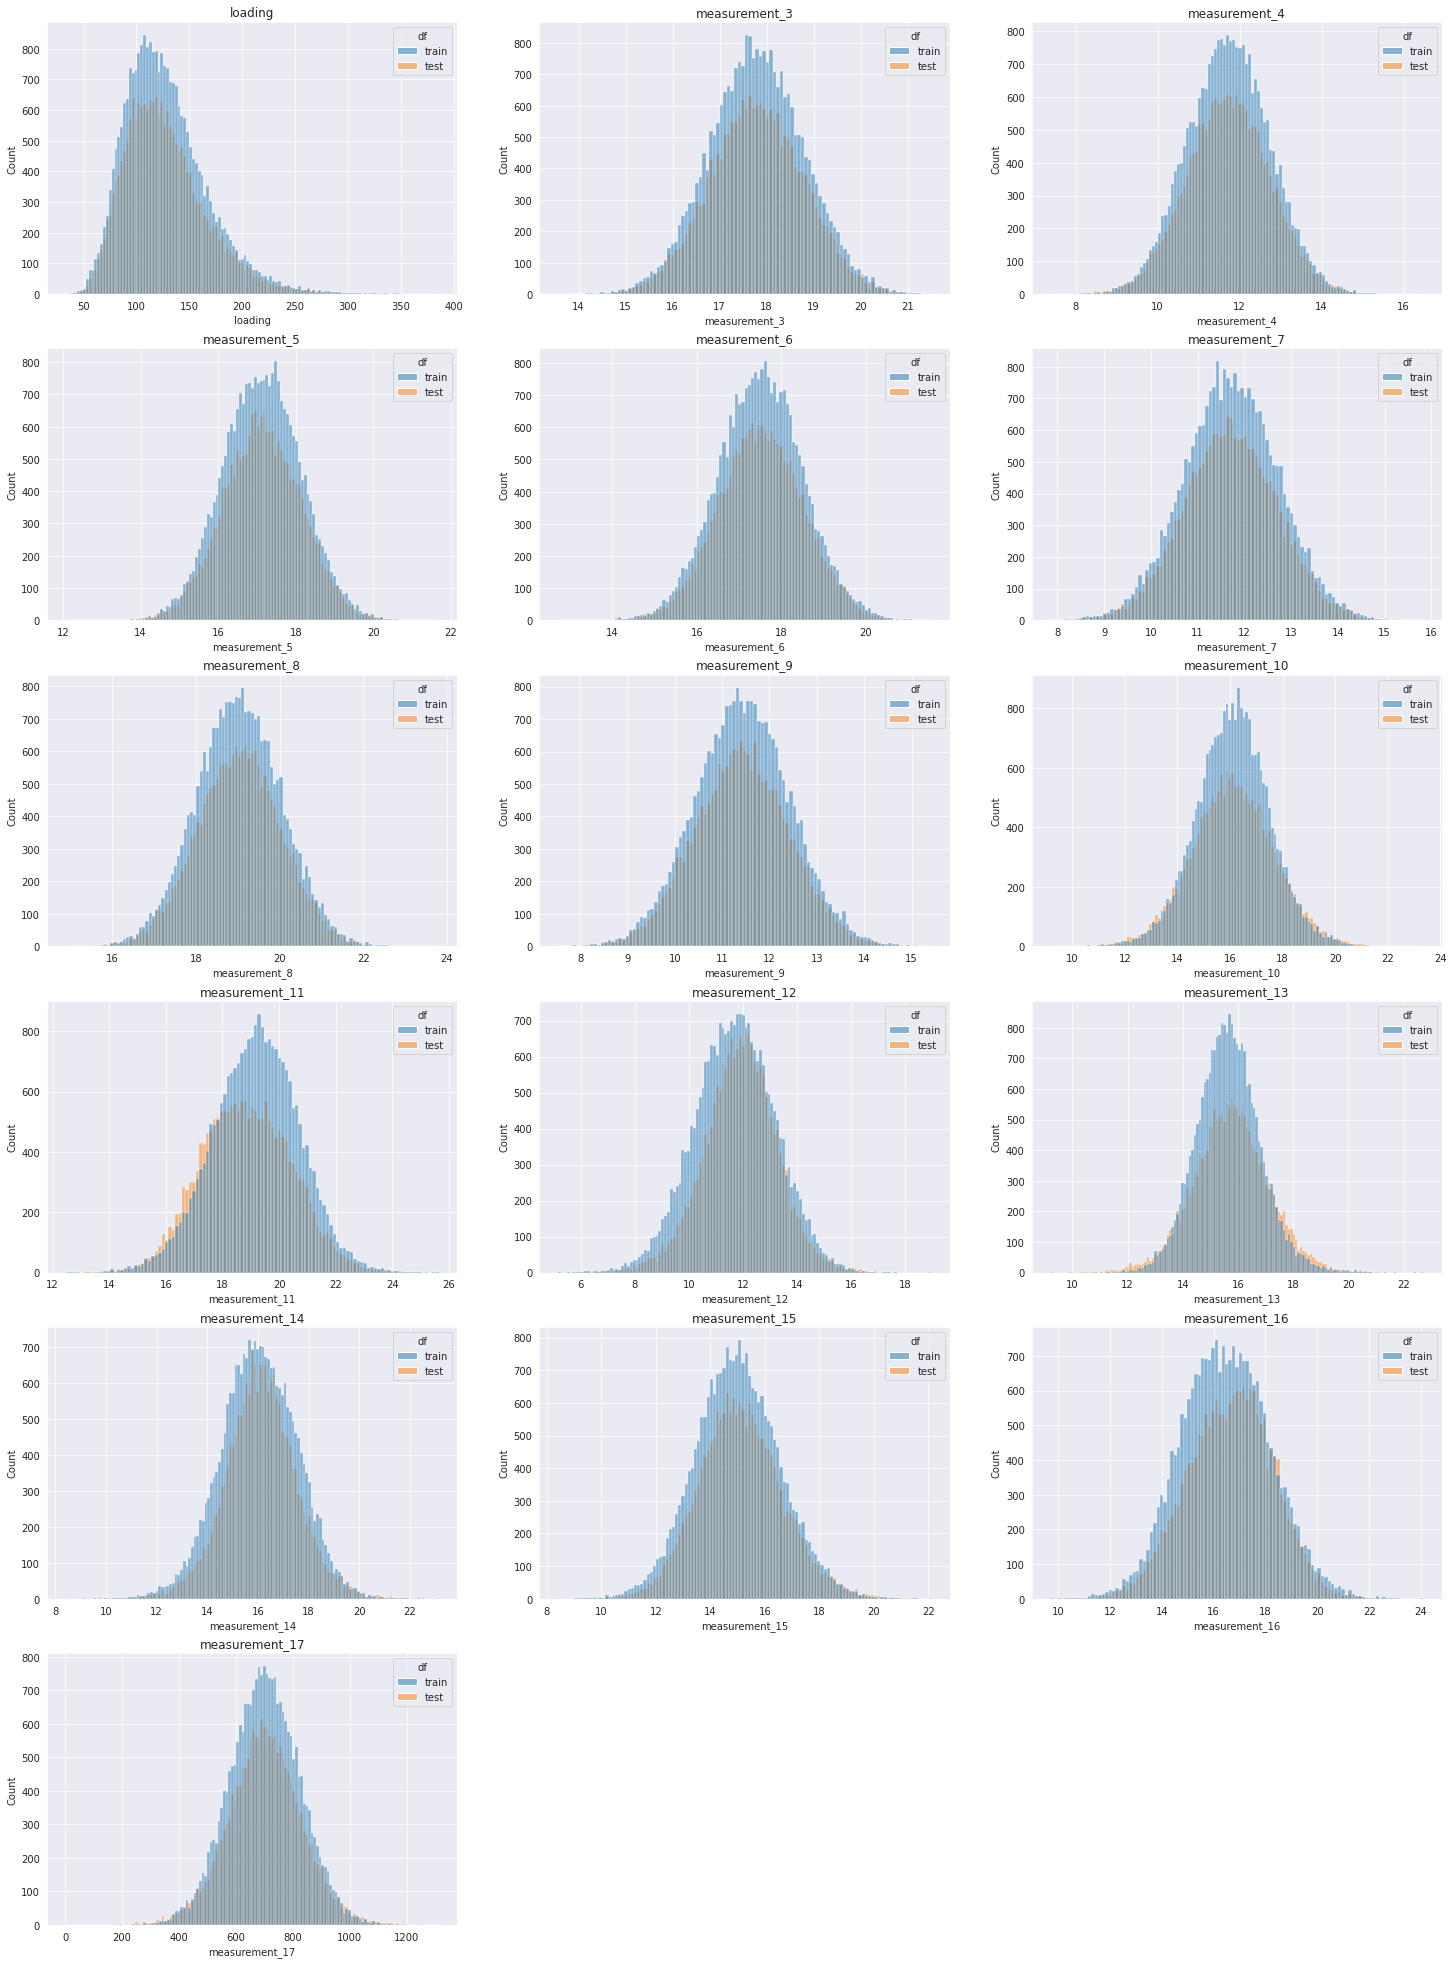

In [41]:
# float column plot
plt.subplots(figsize=(25,35))
train_df["df"] = "train"
test_df["df"] = "test"
for i, column in enumerate(float_cols):
    plt.subplot(6,3,i+1)
    sns.histplot(data=pd.concat([train_df, test_df]).reset_index(drop=True), x=column,hue="df")
    plt.title(column)

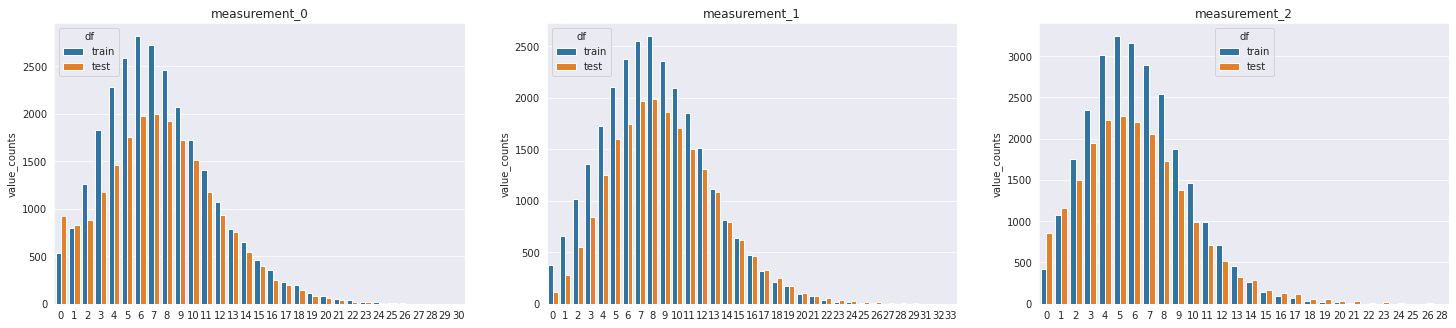

In [42]:
# integer column plot
plt.subplots(figsize=(25,30))
for i, column in enumerate(measurement_int_cols):
    val_count = pd.concat([train_df, test_df])[[column,"df"]].value_counts().rename("value_counts").reset_index()
    plt.subplot(5,3,i+1)
    ax = sns.barplot(data = val_count, x=column, y="value_counts", hue="df")
    ax.set_xlabel(None)
    plt.title(column)

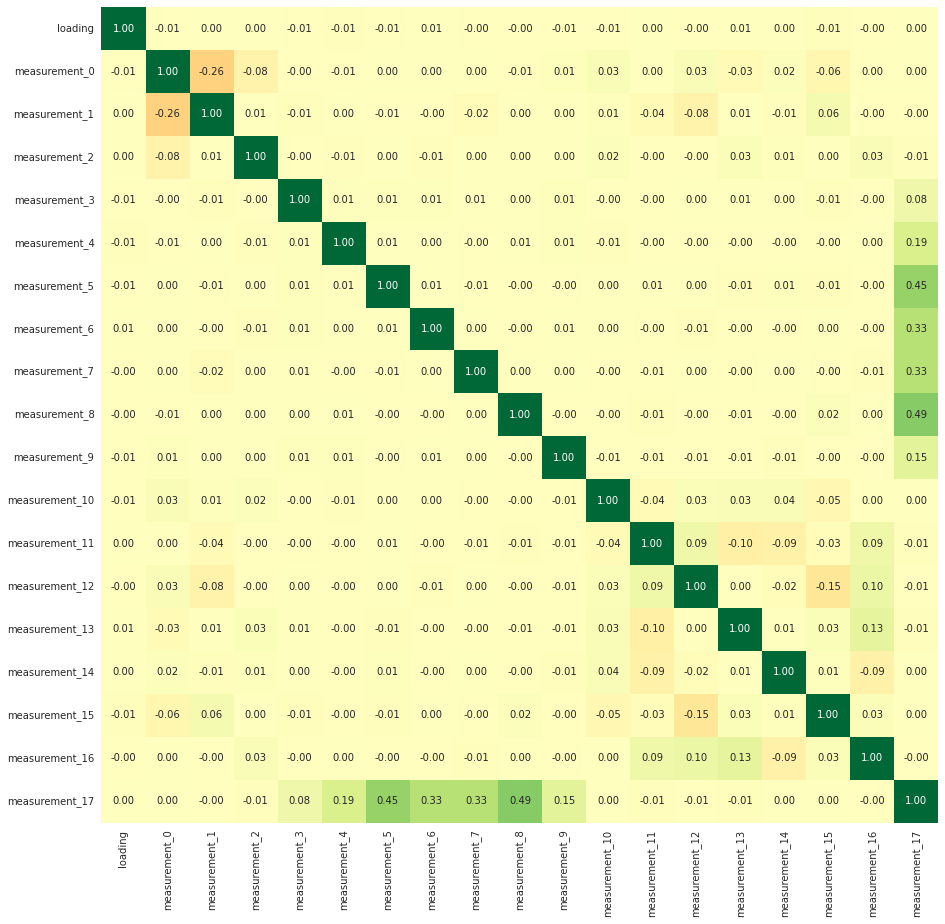

In [43]:
plt.subplots(figsize=(15,15))
sns.heatmap(train_df[["loading"] + measurement_cols].corr(),annot=True, cmap="RdYlGn", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

In [44]:
X = train_df.drop(columns=["id","failure", "product_code","df"]+attribute_cols).dropna()
y = train_df.loc[X.index, "failure"]

In [45]:
#feature select하기 위해 feature별 점수 확인
from sklearn.feature_selection import mutual_info_classif

def make_mi_score(X,y,discrete_features):
    mi_scores = mutual_info_classif(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores,name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_score(X,y,X.dtypes==int)

In [46]:
mi_scores

measurement_11    0.006088
loading           0.005187
measurement_0     0.001654
measurement_3     0.001484
measurement_2     0.001048
measurement_1     0.000782
measurement_15    0.000429
measurement_5     0.000155
measurement_16    0.000000
measurement_14    0.000000
measurement_13    0.000000
measurement_12    0.000000
measurement_8     0.000000
measurement_10    0.000000
measurement_9     0.000000
measurement_7     0.000000
measurement_6     0.000000
measurement_4     0.000000
measurement_17    0.000000
Name: MI Scores, dtype: float64

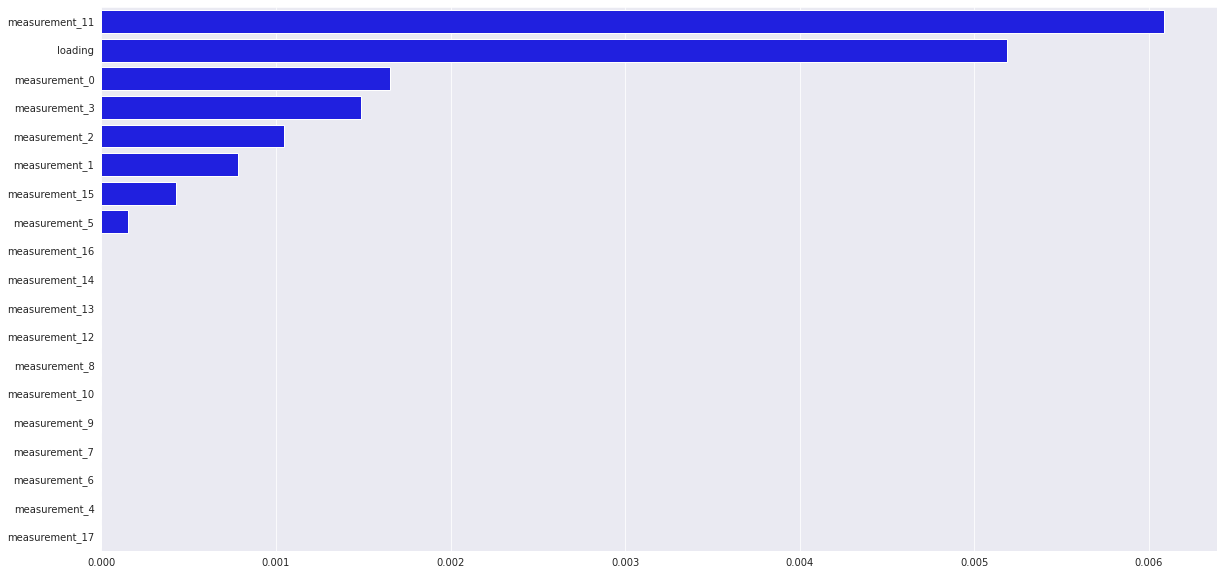

In [47]:
f,ax = plt.subplots(figsize=(20,10))
sns.barplot(y=mi_scores.index, x=mi_scores.values, color="blue");

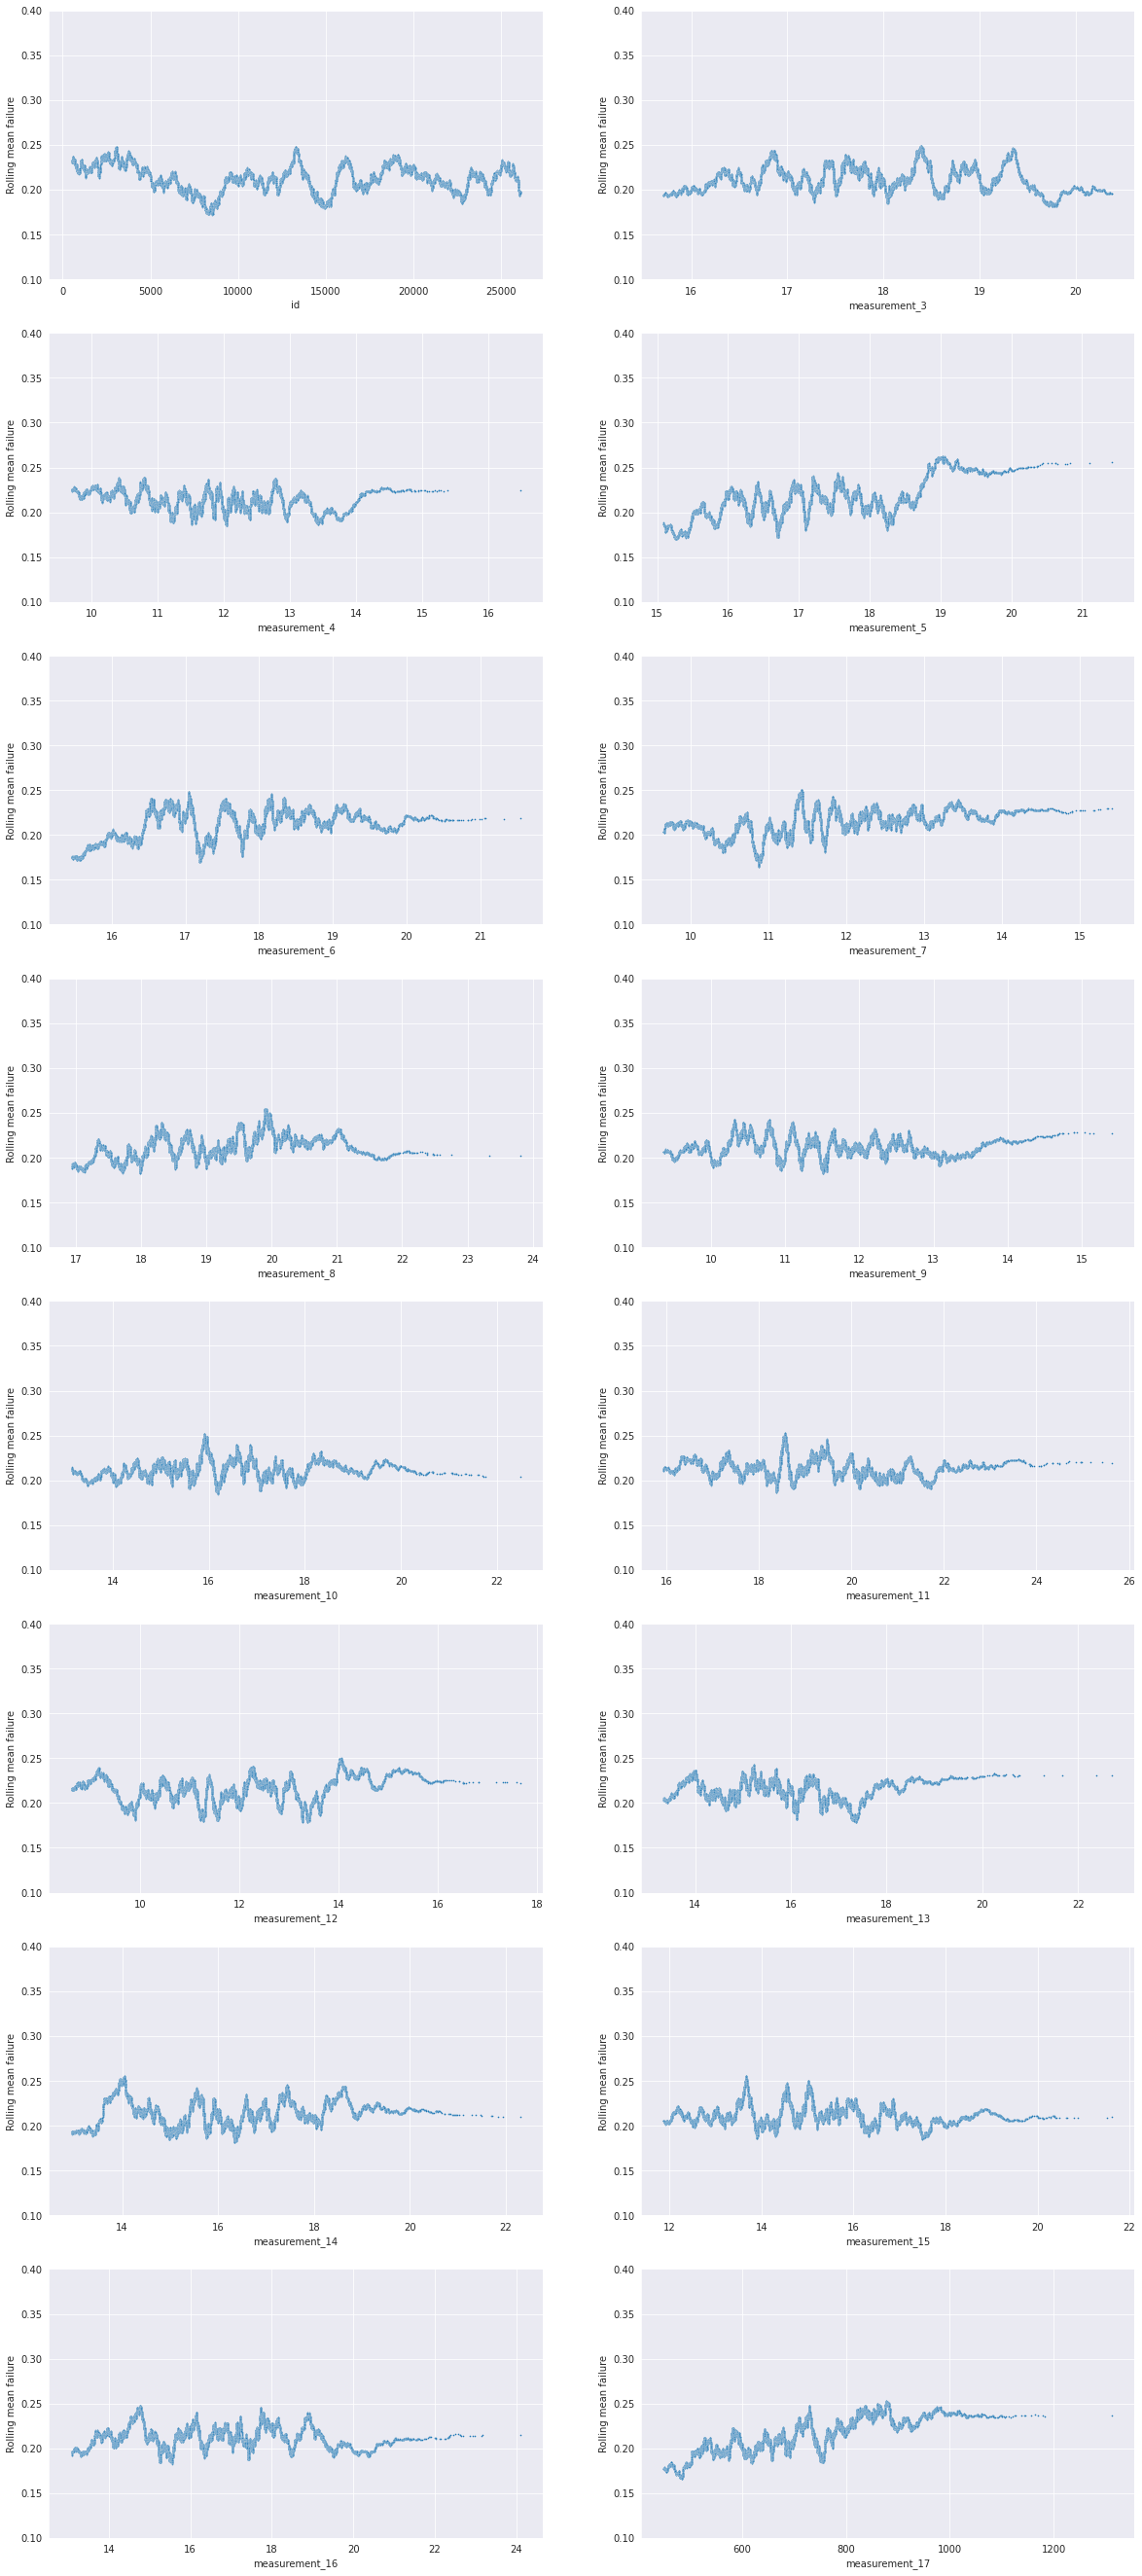

In [48]:
f,ax = plt.subplots(figsize = (20,60))
for n, col in enumerate(["id"]+measurement_float_cols):
    temp_df = pd.DataFrame({col: train_df[col].values, "target":train_df["failure"]})
    temp_df = temp_df.sort_values(col).reset_index(drop=True)
    temp_df["rolling_mean"] = temp_df["target"].rolling(1000, center=True).mean()
    
    ax = plt.subplot(10,2,n+1)
    sns.scatterplot(data=temp_df,x=col,y="rolling_mean",s=3)
    ax.set_ylim([0.1,0.4])
    ax.set_ylabel("Rolling mean failure")

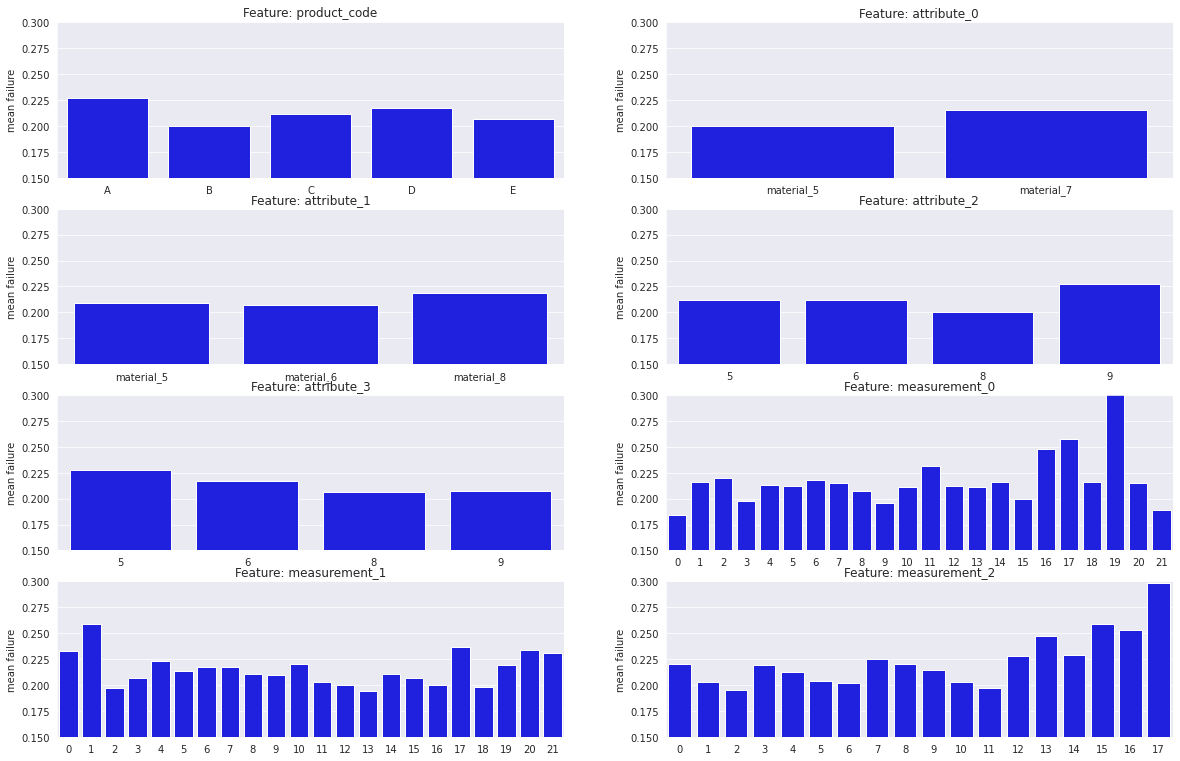

In [49]:
f,ax = plt.subplots(figsize=(20,20))
for i, column in enumerate( ["product_code"] + attribute_cols + measurement_int_cols):
    temp_df = train_df.groupby([column])["failure"].mean()
    temp_df_2 = train_df[column].value_counts()
    temp_df = temp_df[temp_df_2 > 50]
    plt.subplot(6,2,i+1)
    ax = sns.barplot(x=temp_df.index, y=temp_df.values, color="blue")
    ax.set_ylim([0.15,0.3])
    plt.ylabel("mean failure")
    plt.xlabel(None)
    plt.title("Feature: " + column)

In [50]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [51]:
train_df = train_df.drop(columns=["id","df"])
test_df = test_df.drop(columns=["id","df"])

In [52]:
X = train_df.drop(columns = "failure")
y = train_df["failure"]

X_test = test_df

In [53]:
def _scale(train_data, val_data):
    """scales the data, takes train and validation as input and outputs the scaled train data and scaled validation data"""
    #scaler = StandardScaler()
    scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[measurement_cols + ["loading"]])
    scaled_val = scaler.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = scaled_train
    new_val[measurement_cols + ["loading"]] = scaled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [54]:
# mean inputter
def _impute(train_data, val_data):
    """imputes the data, takes train and validation as input and outputs the imputed train data and imputed validation data"""
    #imputer = KNNImputer(n_neighbors=3)
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(train_data[measurement_cols + ["loading"]])
    
    filled_train = imputer.transform(train_data[measurement_cols + ["loading"]])
    filled_val = imputer.transform(val_data[measurement_cols + ["loading"]])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    
    new_train[measurement_cols + ["loading"]] = filled_train
    new_val[measurement_cols + ["loading"]] = filled_val
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [55]:
# one-hot encoding
def _ohe(train_data, val_data):
    """one-hot-encodes the data, takes train and validation data as input and outputs the "one-hot-encoded train and validation data"""
    
    new_train = pd.get_dummies(train_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    new_val = pd.get_dummies(val_data, columns=["product_code","attribute_0", "attribute_1", "attribute_2", "attribute_3"])
    
    #columns are not currently the same, concat so that they are
    train_val = pd.concat([new_train, new_val]).fillna(0) #creates some empty columns, fill these with 0's
    
    #extract train and val again
    new_train = train_val.iloc[0:len(train_data)]
    new_val = train_val.iloc[len(train_data):]
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(val_data)
    
    return new_train, new_val

In [56]:
def k_fold_cv(model,X,y):
    kfold = GroupKFold(n_splits=5)

    feature_imp, y_pred_list, y_true_list, roc_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y, train_df["product_code"])):
        print("===== fold", fold, "=====")
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]
            
        #impute
        X_train, X_val = _impute(X_train, X_val)
            
        #scale the data
        X_train, X_val = _scale(X_train, X_val)
            
        #encode categorical variables
        X_train, X_val = _ohe(X_train, X_val)
            
        # fit the model
        model.fit(X_train,y_train)
            
        #make predictions
        y_pred = model.predict_proba(X_val)[:,1]
            
        #save predictions for later
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)
        
        #evaluate performance
        roc_list.append(roc_auc_score(y_val,y_pred))
        print("roc auc", roc_auc_score(y_val,y_pred))
            
        #feature imporance
        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    return feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val

In [57]:
model = LogisticRegression(penalty="elasticnet", l1_ratio=0.8, C=0.007, tol=1e-2, solver="saga", max_iter=6000,random_state=5)

In [58]:
%%time
feature_imp, y_pred_list, y_true_list, roc_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

===== fold 0 =====
roc auc 0.5861256289563382
===== fold 1 =====
roc auc 0.5807657163001732
===== fold 2 =====
roc auc 0.5885110508897048
===== fold 3 =====
roc auc 0.5951400629496403
===== fold 4 =====
roc auc 0.5957795516657585
CPU times: user 7.87 s, sys: 5.19 s, total: 13.1 s
Wall time: 5.61 s


In [59]:
print("Mean ROC AUC Score:", np.mean(roc_list))

Mean ROC AUC Score: 0.589264402152323


In [60]:
print(roc_auc_score(y_true_list, np.zeros(len(y_true_list))))

0.5


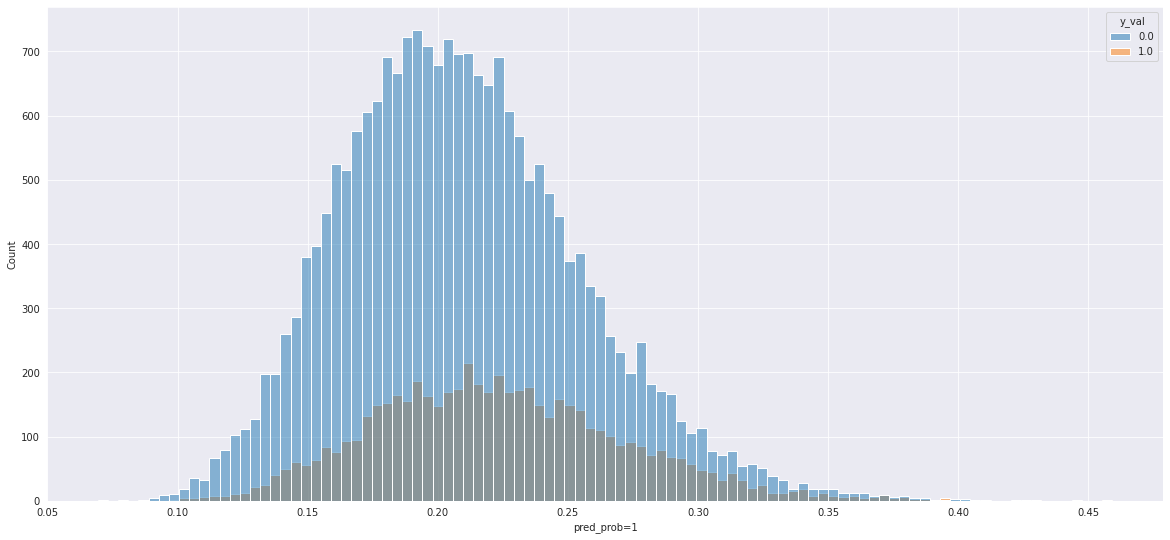

In [61]:
val_preds = pd.DataFrame({"pred_prob=1":y_pred_list, "y_val":y_true_list})
f,ax = plt.subplots(figsize=(20,20))
plt.subplot(2,1,1)
ax = sns.histplot(data=val_preds, x="pred_prob=1", hue="y_val", bins = 100)

In [62]:
def inference(X, X_test, iterations):
    pred_list = []
    for i in range(iterations):
        X_train = X.sample(int(0.8*len(X)))
        y_train = y.loc[X_train.index]

        X_train, X_te = _impute(X_train, X_test)

        #scale the data
        X_train, X_te = _scale(X_train, X_te)

        #encode categorical variables
        X_train, X_te = _ohe(X_train, X_te)
        
        model = LogisticRegression(penalty='elasticnet', l1_ratio=0.8, C=0.007, tol = 1e-2, solver='saga', max_iter=1000, random_state=i)
        # fit the model
        model.fit(X_train,y_train)

        #make predictions
        y_pred = model.predict_proba(X_te)[:,1]
        
        pred_list.append(y_pred)
    
    pred_df = pd.DataFrame(pred_list).T
    pred_df = pred_df.rank()
    pred_df["mean"] = pred_df.mean(axis=1)
    
    return pred_df

In [63]:
%%time
predictions_df = inference(X, X_test, 500)

CPU times: user 14min 40s, sys: 9min 30s, total: 24min 11s
Wall time: 10min 40s


In [64]:
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,mean
0,9143.0,8969.0,8904.0,8804.0,9051.0,9100.0,9130.0,9250.0,9120.0,9089.0,...,9054.0,8914.0,9060.0,9202.0,9188.0,9003.0,9011.0,8913.0,10079.0,9080.286
1,5438.0,6620.0,6526.0,6235.0,6125.0,6415.0,6613.0,6313.0,5911.0,6505.0,...,6315.0,6222.0,6700.0,6846.0,5893.0,6320.0,6710.0,5600.0,6381.0,6350.334
2,7250.0,7480.0,7571.0,7501.0,7598.0,7710.0,7713.0,7824.0,7482.0,7498.0,...,7724.0,7522.0,7647.0,7701.0,7689.0,7583.0,7533.0,7370.0,8292.0,7575.978
3,7363.0,6936.0,7003.0,6879.0,7184.0,7042.0,7319.0,7436.0,7292.0,7134.0,...,7093.0,7100.0,7322.0,7251.0,7284.0,7184.0,6901.0,7406.0,7208.0,7224.404
4,20117.0,20135.0,20179.0,20195.0,20191.0,20170.0,20118.0,20068.0,20220.0,20189.0,...,20226.0,20204.0,20175.0,20137.0,20207.0,20228.0,20174.0,20228.0,20087.0,20177.990


In [65]:
pred_df = pd.DataFrame(y_pred_list, columns=["pred_prob"])
pred_df["rank"] = pred_df.rank()

In [66]:
pred_df.head(10)

,pred_prob,rank
0,0.187304,8503.0
1,0.209677,13533.0
2,0.180918,7134.0
3,0.195885,10487.0
4,0.313614,25883.0
5,0.196403,10617.0
6,0.186790,8384.0
7,0.241335,19952.0
8,0.204005,12239.0
9,0.206674,12885.0


In [67]:
print("roc auc using prediction probabilities:", roc_auc_score(y_true_list, pred_df["pred_prob"]))
print("roc auc using predicted probabilities ranks:", roc_auc_score(y_true_list, pred_df["rank"]))

roc auc using prediction probabilities: 0.5881361226647592
roc auc using predicted probabilities ranks: 0.5881361226647592


In [68]:
sub_df = pd.read_csv(path+"sample_submission.csv")
sub_df["failure"] = predictions_df["mean"]
sub_df

,id,failure
0,26570,9080.286
1,26571,6350.334
2,26572,7575.978
3,26573,7224.404
4,26574,20177.990
...,...,...
20770,47340,14914.920
20771,47341,847.578
20772,47342,636.470
20773,47343,12042.030


In [69]:
sub_df.to_csv('submission_lr.csv', index=False)